# Basic Overview 
The primary objective is to visualize and analyze the death rate data for every state in USA for the years 1999-2015. This is basically a learning project for me to master analysis and visualization skills in pandas.

Comments/criticisms/appreciations are greatly accepted and appreciated. Do not be shy and send me an email at babinu@gmail.com !

Source of data : https://catalog.data.gov/dataset/age-adjusted-death-rates-for-the-top-10-leading-causes-of-death-united-states-2013

In [1]:
# Section for importing relevant modules. Note that in order to increase readability , we will be importing necessary
# modules only as and when it is needed, rather than all at once.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
death_rate_data = pd.read_csv("project_1_death_cause_analysis.csv")

In [3]:
death_rate_data.columns

Index(['Year', '113 Cause Name', 'Cause Name', 'State', 'Deaths',
       'Age-adjusted Death Rate'],
      dtype='object')

###  A quick display of the obtained dataframe


In [4]:
death_rate_data.head()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,Alabama,2313.0,52.2
1,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,Alaska,294.0,55.9
2,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,Arizona,2214.0,44.8
3,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,Arkansas,1287.0,47.6
4,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,California,9198.0,28.7


### Can we explore redundancy between columns '113 Cause Name' and 'Cause Name' and remove one of them ?


In [5]:
death_rate_data[['113 Cause Name', 'Cause Name']].head()

,113 Cause Name,Cause Name
0,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries
1,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries
2,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries
3,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries
4,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries


In [6]:
# To test for a one to one mapping between 2 columns, we do the following.
# 1. Check the number of unique entries for column 1
# 2. Do the same for column 2
# 3. Do the same for tuples of column 1 and column 2 values
# If all three return the same value, we have a one to one mapping.
print("Number of unique entries in column 'Cause Name': ",
      len(death_rate_data['Cause Name'].unique()))
print("Number of unique entries in column '113 Cause Name': ",
      len(death_rate_data['113 Cause Name'].unique()))
print("Number of unique ('Cause Name', '113 Cause Name') tuples : ",
      len(death_rate_data[['113 Cause Name', 'Cause Name']].drop_duplicates()))

Number of unique entries in column 'Cause Name':  17
Number of unique entries in column '113 Cause Name':  17
Number of unique ('Cause Name', '113 Cause Name') tuples :  17


In [7]:
# Remove a redundant column.
death_rate_data_v2 = death_rate_data.drop(columns='113 Cause Name')

### Data Validation on all columns


In [8]:
# Column 'Year'
print("Number of unique entries in column 'Year' is %s and they are %s" 
      %(len(death_rate_data_v2['Year'].unique()),death_rate_data_v2['Year'].unique()))

Number of unique entries in column 'Year' is 17 and they are [1999 2003 2000 2005 2001 2006 2002 2010 2004 2011 2013 2007 2008 2014
 2009 2012 2015]


In [9]:
# Column 'Cause Name'
print("Number of unique entries in column 'Cause Name' is %s and they are %s" 
      %(len(death_rate_data_v2['Cause Name'].unique()),death_rate_data_v2['Cause Name'].unique()))

Number of unique entries in column 'Cause Name' is 17 and they are ['Unintentional Injuries' 'All Causes' "Alzheimer's disease" 'Homicide'
 'Stroke' 'Chronic liver disease and cirrhosis' 'CLRD' 'Diabetes'
 'Diseases of Heart'
 'Essential hypertension and hypertensive renal disease'
 'Influenza and pneumonia' 'Cancer' 'Suicide' 'Kidney Disease'
 "Parkinson's disease" 'Pneumonitis due to solids and liquids'
 'Septicemia']


In [10]:
# Column 'State'
print("Number of unique entries in column 'State' is %s and they are %s" 
      %(len(death_rate_data_v2['State'].unique()),death_rate_data_v2['State'].unique()))

Number of unique entries in column 'State' is 52 and they are ['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'United States' 'Utah' 'Vermont'
 'Virginia' 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']


### Why do we have 52 states instead of 50 here ?

In [11]:
print('Is \'United States\' present in column \'State\':', 
      'United States' in death_rate_data_v2['State'].values)
print('Is \'District of Columbia\' present in column \'State\':', 
      'District of Columbia' in death_rate_data_v2['State'].values)

Is 'United States' present in column 'State': True
Is 'District of Columbia' present in column 'State': True


### Shouldn't the data for 'United States' be aggregate of the data corresponding to individual states ?


In [12]:
# Aggregate the number of deaths across states for a particular year and cause and check if the value
# matched with that of United States.
united_states_data = death_rate_data_v2[death_rate_data_v2['State'] == 'United States']
death_rate_data_v3 = death_rate_data_v2[death_rate_data_v2['State'] != 'United States']

year_cause_group_data = death_rate_data_v3['Deaths'].groupby(
    [death_rate_data_v3['Year'], death_rate_data_v3['Cause Name']]).sum()

# Reset indices of the group by object and make sure that dataframes are perfectly mergable..
year_cause_data_v1 = year_cause_group_data.reset_index().copy()
united_states_data_v1 = united_states_data.sort_values(
    by=['Year', 'Cause Name'])[
    ['Year', 'Cause Name', 'Deaths']].reset_index().drop(columns=['index']).copy()

# Merge to one data frame for ease of comparisons later on.
aggregated_and_usa_data = pd.merge(year_cause_data_v1, 
                                   united_states_data_v1[['Deaths']], 
                                   left_index=True, 
                                   right_index=True, 
                                   how='inner',
                                   suffixes=('_agg', '_usa'))

aggregated_and_usa_data['Deaths_diff'] = aggregated_and_usa_data['Deaths_agg'] - aggregated_and_usa_data['Deaths_usa']
aggregated_and_usa_data[aggregated_and_usa_data['Deaths_diff'] != 0]

,Year,Cause Name,Deaths_agg,Deaths_usa,Deaths_diff
7,1999,Essential hypertension and hypertensive renal ...,16963.0,16968.0,-5.0
41,2001,Essential hypertension and hypertensive renal ...,19244.0,19250.0,-6.0
42,2001,Homicide,20299.0,20308.0,-9.0
58,2002,Essential hypertension and hypertensive renal ...,20252.0,20261.0,-9.0
59,2002,Homicide,17614.0,17638.0,-24.0
127,2006,Homicide,18564.0,18573.0,-9.0
161,2008,Homicide,17823.0,17826.0,-3.0
178,2009,Homicide,16791.0,16799.0,-8.0
195,2010,Homicide,16242.0,16259.0,-17.0
212,2011,Homicide,16230.0,16238.0,-8.0


### Plots showing evolution of age adjusted death rate per state

In [13]:
# Set year as the index , which will make it much easier to plot data later on.

death_rate_data_v3.set_index('Year', inplace=True)
united_states_data.set_index('Year', inplace=True)

In [14]:
from plotting_functions import plot_rel_data_v2

count    17.000000
mean      5.905882
std       0.823461
min       4.600000
25%       5.100000
50%       6.000000
75%       6.800000
max       7.000000
Name: Age-adjusted Death Rate, dtype: float64


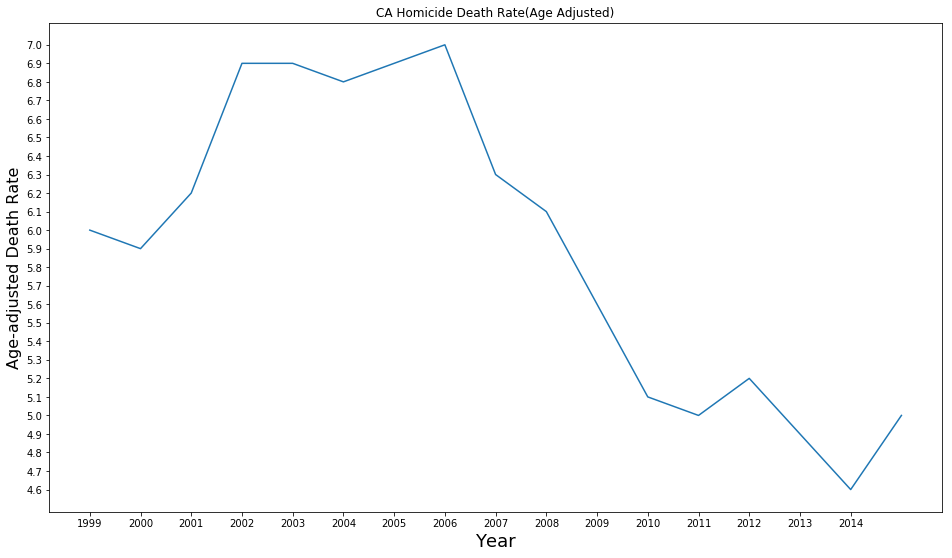

In [15]:
# California
plot_rel_data_v2(death_rate_data_v3[
    (death_rate_data_v3['State'] == 'California') & (death_rate_data_v3['Cause Name'] == 'Homicide')]['Age-adjusted Death Rate'],
        'Year', 
        'Age-adjusted Death Rate', 
        'CA Homicide Death Rate(Age Adjusted)',
         1.0,
         0.1)



count    17.000000
mean      5.011765
std       2.539410
min       3.400000
25%       4.300000
50%       4.600000
75%       5.000000
max      14.600000
Name: Age-adjusted Death Rate, dtype: float64


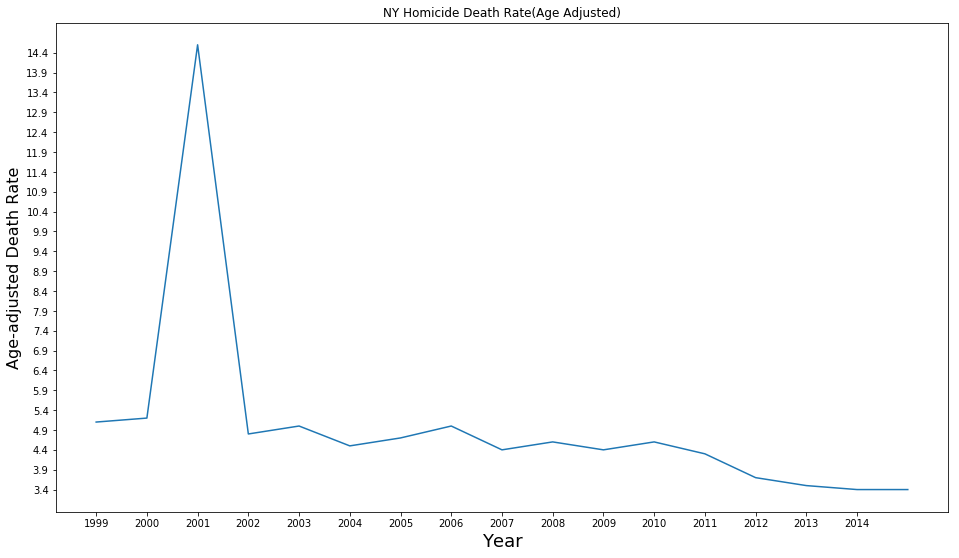

In [16]:
# Same thing for New York
plot_rel_data_v2(death_rate_data_v3[
    (death_rate_data_v3['State'] == 'New York') & (death_rate_data_v3['Cause Name'] == 'Homicide')]['Age-adjusted Death Rate'],
        'Year', 
        'Age-adjusted Death Rate', 
        'NY Homicide Death Rate(Age Adjusted)',
         1.0,
         0.5)

count    17.000000
mean      5.023529
std       1.912959
min       3.600000
25%       4.400000
50%       4.800000
75%       4.900000
max      12.200000
Name: Age-adjusted Death Rate, dtype: float64


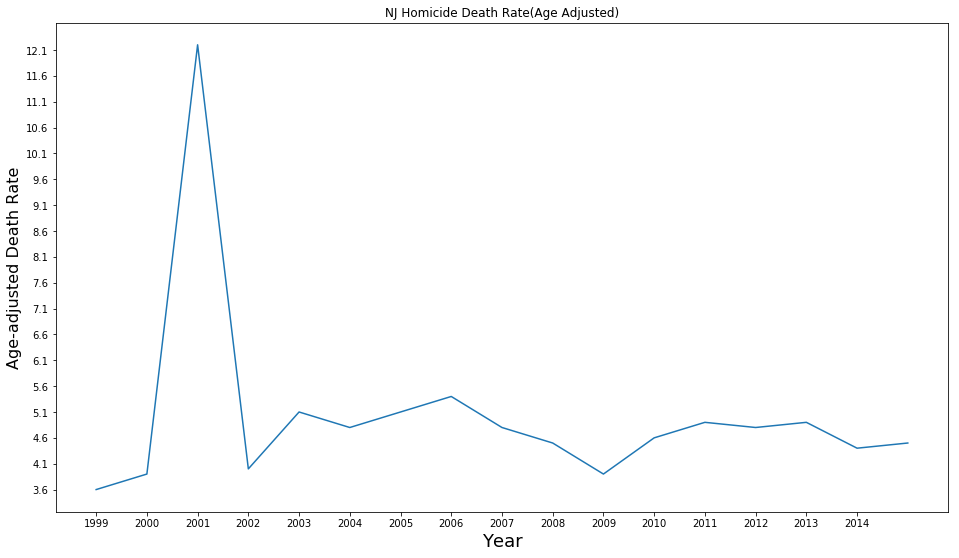

In [17]:
# Same thing for New Jersey
plot_rel_data_v2(death_rate_data_v3[
    (death_rate_data_v3['State'] == 'New Jersey') & 
    (death_rate_data_v3['Cause Name'] == 'Homicide')]['Age-adjusted Death Rate'],
        'Year', 
        'Age-adjusted Death Rate', 
        'NJ Homicide Death Rate(Age Adjusted)',
         1.0,
         0.5)


count    17.000000
mean      5.817647
std       0.492741
min       5.100000
25%       5.400000
50%       5.900000
75%       6.100000
max       7.100000
Name: Age-adjusted Death Rate, dtype: float64


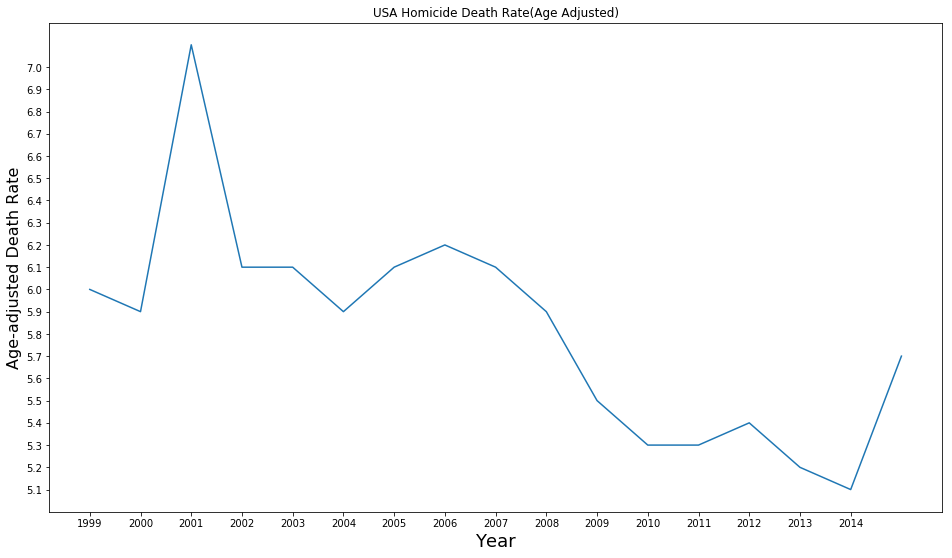

In [18]:
# Same thing for entire USA
plot_rel_data_v2(united_states_data[
    (united_states_data['Cause Name'] == 'Homicide')]['Age-adjusted Death Rate'],
        'Year', 
        'Age-adjusted Death Rate', 
        'USA Homicide Death Rate(Age Adjusted)',
         1.0,
         0.1)



### Can we start combining the plots, so that we can see data for 2 states together ?

       Age-adjusted Death Rate_CA  Age-adjusted Death Rate_NY
count                   17.000000                   17.000000
mean                     5.905882                    5.011765
std                      0.823461                    2.539410
min                      4.600000                    3.400000
25%                      5.100000                    4.300000
50%                      6.000000                    4.600000
75%                      6.800000                    5.000000
max                      7.000000                   14.600000


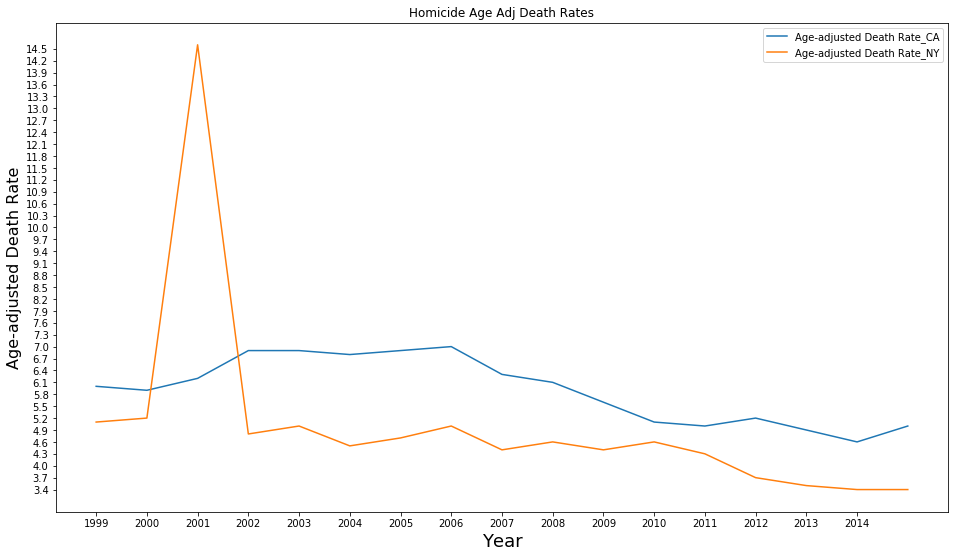

In [19]:
# Combining plots for multiple states
def get_muliple_state_death_rate_data(state1, state2, state1_short, state2_short, cause_name):

    ca_homicide = death_rate_data_v3[
        (death_rate_data_v3['State'] == state1) & (death_rate_data_v3['Cause Name'] == cause_name)]
    ny_homicide = death_rate_data_v3[
        (death_rate_data_v3['State'] == state2) & (death_rate_data_v3['Cause Name'] == cause_name)]


    multiple_states_data = pd.merge(ca_homicide[['Age-adjusted Death Rate']], 
                                    ny_homicide[['Age-adjusted Death Rate']], 
                                    left_index=True, 
                                    right_index=True, 
                                    how='inner',
                                    suffixes=('_' + state1_short, '_' + state2_short))

    return(multiple_states_data)


multiple_states_data = get_muliple_state_death_rate_data('California', 'New York', 'CA', 'NY', 'Homicide')
plot_rel_data_v2(multiple_states_data, 'Year', 'Age-adjusted Death Rate', 'Homicide Age Adj Death Rates', 1, 0.3)


### Can we compare homicide rates of Wyoming (most conservative) and California(most liberal) ?

       Age-adjusted Death Rate_CA  Age-adjusted Death Rate_WY
count                   17.000000                    4.000000
mean                     5.905882                    4.175000
std                      0.823461                    0.478714
min                      4.600000                    3.500000
25%                      5.100000                    4.025000
50%                      6.000000                    4.300000
75%                      6.800000                    4.450000
max                      7.000000                    4.600000


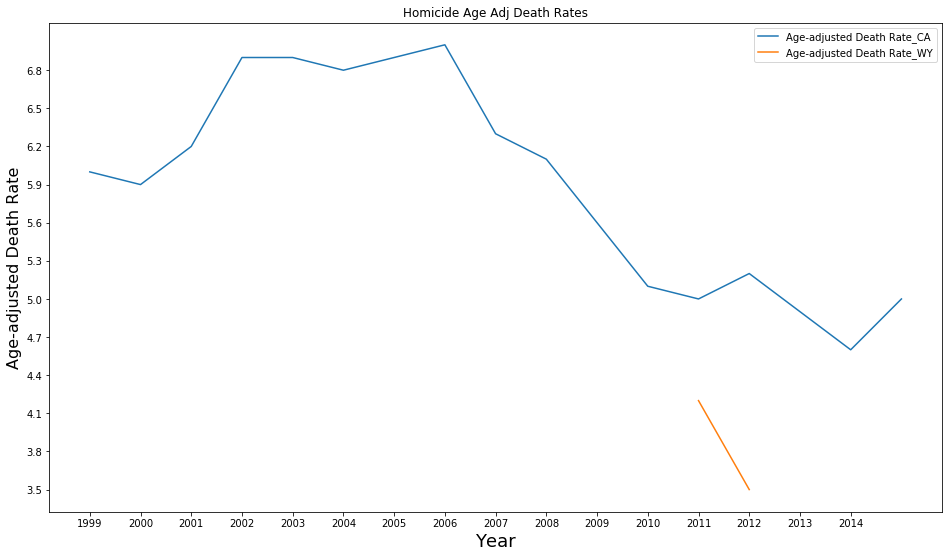

In [20]:
# Wyoming vs California
multiple_states_data = get_muliple_state_death_rate_data('California', 'Wyoming', 'CA', 'WY', 'Homicide')
plot_rel_data_v2(multiple_states_data, 'Year', 'Age-adjusted Death Rate', 'Homicide Age Adj Death Rates', 1, 0.3)

# NOTE : We look to be having only few data points for Wyoming and hence this one fizzles out !!

       Age-adjusted Death Rate_CA  Age-adjusted Death Rate_WA
count                   17.000000                   17.000000
mean                     5.905882                    3.229412
std                      0.823461                    0.288887
min                      4.600000                    2.700000
25%                      5.100000                    3.100000
50%                      6.000000                    3.300000
75%                      6.800000                    3.500000
max                      7.000000                    3.600000


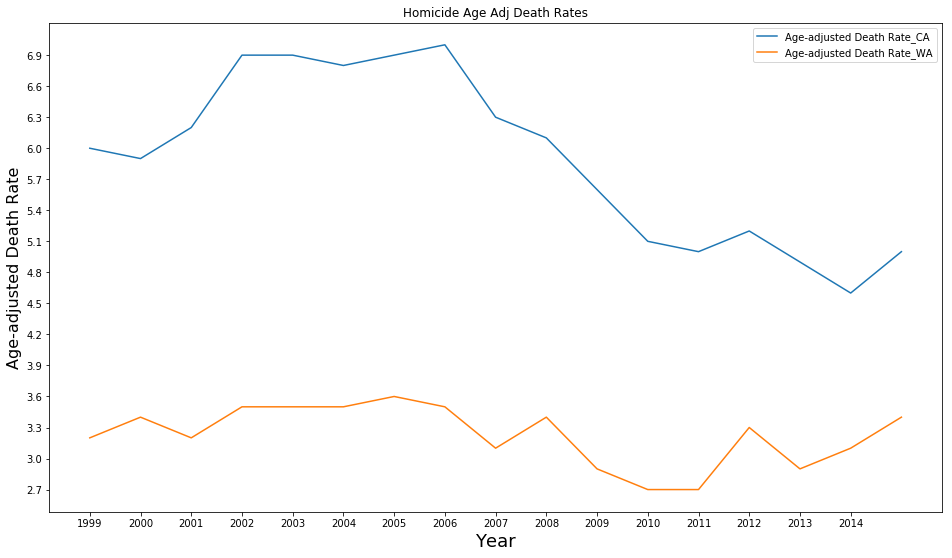

In [21]:
# WA vs CA (in homicide)  
multiple_states_data = get_muliple_state_death_rate_data('California', 'Washington', 'CA', 'WA', 'Homicide')
plot_rel_data_v2(multiple_states_data, 'Year', 'Age-adjusted Death Rate', 'Homicide Age Adj Death Rates', 1, 0.3)


       Age-adjusted Death Rate_CA  Age-adjusted Death Rate_AK
count                   17.000000                   17.000000
mean                     5.905882                    7.629412
std                      0.823461                    0.599755
min                      4.600000                    6.600000
25%                      5.100000                    7.300000
50%                      6.000000                    7.600000
75%                      6.800000                    7.900000
max                      7.000000                    8.800000


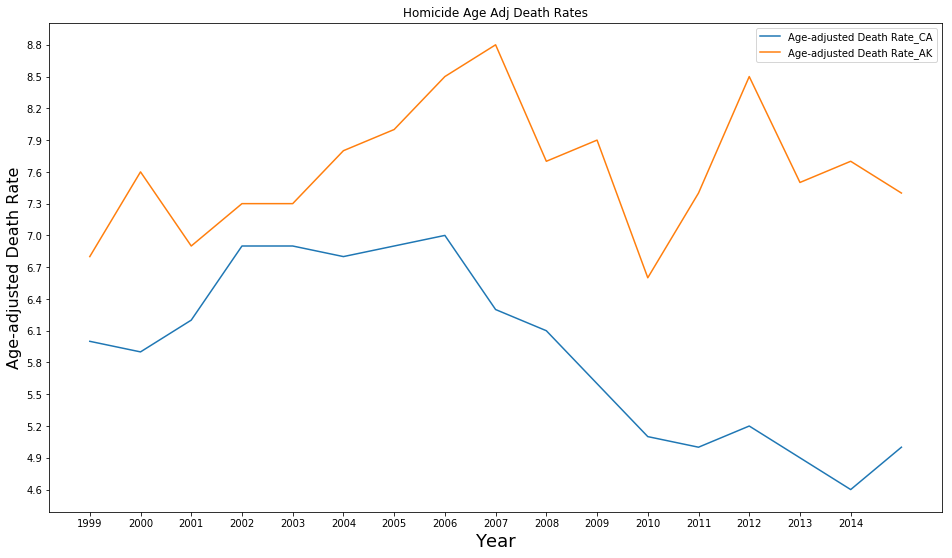

In [22]:
# Arkansas vs California
multiple_states_data = get_muliple_state_death_rate_data('California', 'Arkansas', 'CA', 'AK', 'Homicide')
plot_rel_data_v2(multiple_states_data, 'Year', 'Age-adjusted Death Rate', 'Homicide Age Adj Death Rates', 1, 0.3)


### Can we compared diabetes related death rates between Alaska and Florida and test for statistical significance ?

       Age-adjusted Death Rate_AL  Age-adjusted Death Rate_FA
count                   17.000000                   17.000000
mean                    22.435294                   20.841176
std                      2.835256                    1.299547
min                     18.100000                   18.600000
25%                     20.100000                   19.700000
50%                     22.400000                   21.500000
75%                     23.900000                   21.700000
max                     27.700000                   22.700000


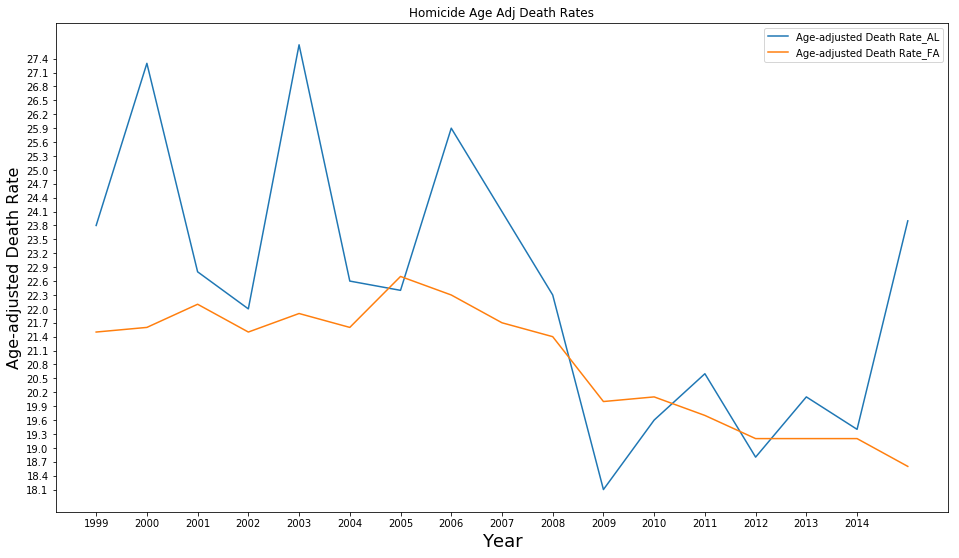

In [23]:
# Alaska vs Florida : Diabetes
multiple_states_data = get_muliple_state_death_rate_data('Alaska', 'Florida', 'AL', 'FA', 'Diabetes')
plot_rel_data_v2(multiple_states_data, 'Year', 'Age-adjusted Death Rate', 'Homicide Age Adj Death Rates', 1, 0.3)


### As a pre-requisite for tests of statistical significance, we need to test the samples as to whether they correspond to a normal distribution

/Users/babs4JESUS/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


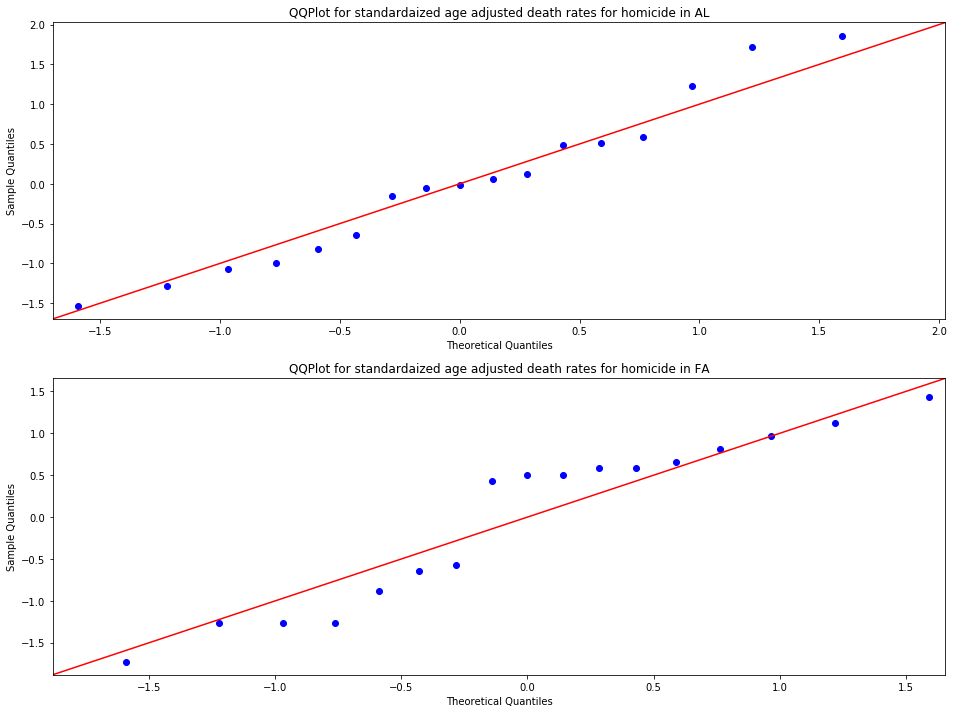

In [24]:
## QQPlot using statsmodels.

import statsmodels.api as sm
from scipy import stats

# Standardize data before checking for normality as qqplot in statsmodels
# does not work correctly while comparing with non standard normal 
# distributions(https://github.com/statsmodels/statsmodels/issues/4695)
multiple_states_data['Age_data_standardized_AL'] = \
    (multiple_states_data['Age-adjusted Death Rate_AL'] - 
     multiple_states_data['Age-adjusted Death Rate_AL'].mean())/\
    multiple_states_data['Age-adjusted Death Rate_AL'].std()
multiple_states_data['Age_data_standardized_FA'] = \
    (multiple_states_data['Age-adjusted Death Rate_FA'] - 
     multiple_states_data['Age-adjusted Death Rate_FA'].mean())/\
    multiple_states_data['Age-adjusted Death Rate_FA'].std()

fig, ax = plt.subplots(2, 1, figsize=(16, 12))
sm.qqplot(
     multiple_states_data['Age_data_standardized_AL'],      
     ax=ax[0],
     line='45'
    )
ax[0].set_title('QQPlot for standardaized age adjusted death rates for homicide in AL')
sm.qqplot(
     multiple_states_data['Age_data_standardized_FA'],      
     ax=ax[1],
     line='45'
    ) 

ax[1].set_title('QQPlot for standardaized age adjusted death rates for homicide in FA')
plt.show()

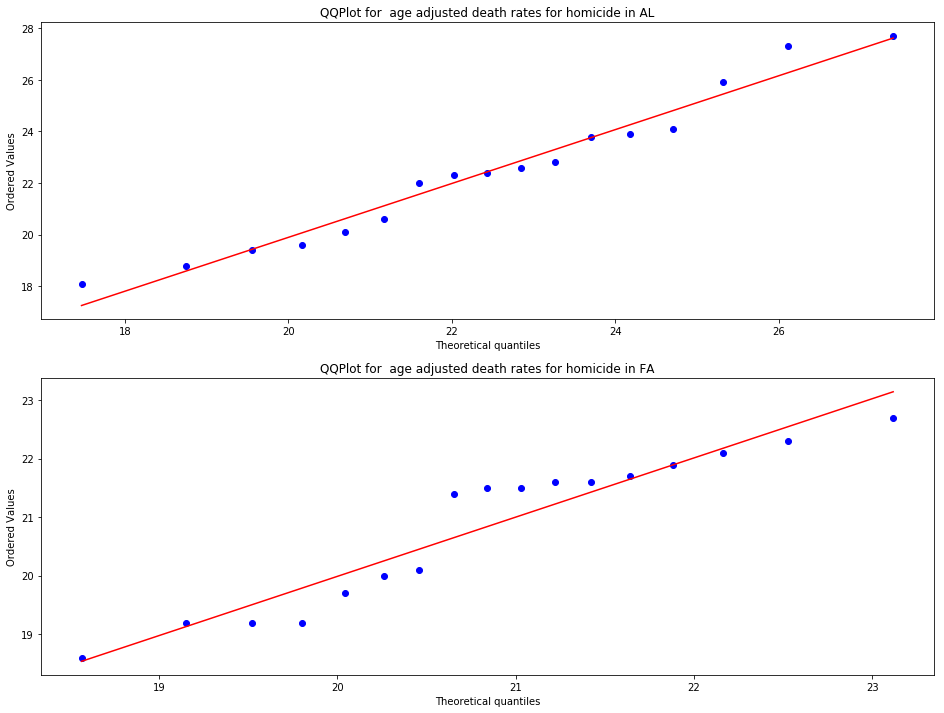

In [25]:
# Alternatively, one use probplot from scipy states, which allow us to enter non zero mean and standard deviation 
# other than 1.
fig, ax = plt.subplots(2, 1, figsize=(16, 12))
stats.probplot(multiple_states_data['Age-adjusted Death Rate_AL'].values, 
               dist=stats.norm, 
               sparams=(multiple_states_data['Age-adjusted Death Rate_AL'].mean(),
                        multiple_states_data['Age-adjusted Death Rate_AL'].std()), 
               plot=ax[0])

ax[0].set_title('QQPlot for  age adjusted death rates for homicide in AL')

stats.probplot(multiple_states_data['Age-adjusted Death Rate_FA'].values, 
               dist=stats.norm, 
               sparams=(multiple_states_data['Age-adjusted Death Rate_FA'].mean(),
                        multiple_states_data['Age-adjusted Death Rate_FA'].std()), 
               plot=ax[1])

ax[1].set_title('QQPlot for  age adjusted death rates for homicide in FA')

plt.show()

### What tests can we do to establish results of statistical significance ?

#### Since we have the sample sizes same across the board, this gives us an incredible simplification since, we can take the difference between 2 samples and use  one sample tests, as opposed to two sample tests.

#### This also helps us to apply the CLT directly and hence bypass the normality assumption. However, since our sample size is very small, we cannot directly conclude that sample means follow a normal distribution (https://www.umass.edu/remp/Papers/Smith&Wells_NERA06.pdf) and this cripples our ability to do further tests of statistical significance.

#### It must also be mentioned that as a side effect of the extremely small sample size, the power of any test if performed would be quite small as well, questioning it's effectiveness (an example can be seen here : https://www.ssc.wisc.edu/~gwallace/PA_818/Resources/Type%20II%20Error%20and%20Power%20Calculations.pdf).


### Conclusion:

##### Data looked promising, but unfortunately , the number of data points were not sufficient to warrant a statistically significant result.